# Assignment No 6 (Task 1 & Task 2)

# Task 1 

In [1]:
import numpy as np
import pandas as pd
titanic = pd.read_csv("https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv")
titanic.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [2]:
len(titanic)

1310

In [ ]:
#Charts to plot:
# Question No 1. Create a pie chart presenting the male/female proportion

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

Male_Female_Prop = titanic['sex']
Male_Female_Prop.value_counts()


male      843
female    466
Name: sex, dtype: int64

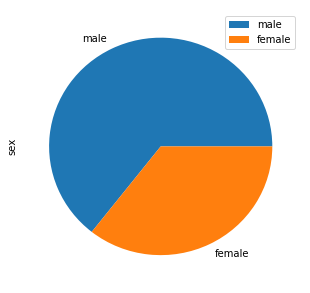

In [4]:
Male_Female_Prop.value_counts().plot(kind='pie',legend=True,figsize=(5,5))

In [ ]:
# Question No 2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [9]:
fare_age = titanic[['fare','age']]

titanic.age.fillna(method='ffill')
fare_age.fillna(method='backfill')

,fare,age
0,211.3375,29.0000
1,151.5500,0.9167
2,151.5500,2.0000
3,151.5500,30.0000
4,151.5500,25.0000
5,26.5500,48.0000
6,77.9583,63.0000
7,0.0000,39.0000
8,51.4792,53.0000
9,49.5042,71.0000


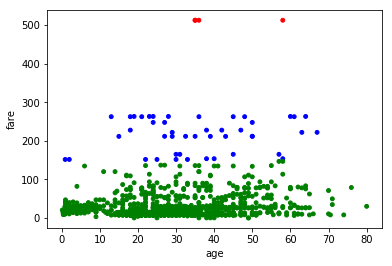

In [11]:
#colors = np.where(fare_age.fare < 100, '*','o')

col = []

for j in fare_age.fare:
    if j <150:
        col.append('g')

    elif j < 300:
        col.append('b')

    else:
        col.append('r')

fare_age.plot(kind='scatter', x='age', y='fare',c=col,s=15,marker="o",legend=True)

# Task 2

In [1]:
# It happens all the time: someone gives you data containing malformed strings, Python, lists and
# missing data. How do you tidy it up so you can get on with the analysis? 
# Take this monstrosity as the DataFrame to use in the following puzzles:


In [28]:
import numpy as np
import pandas as pd

df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm','Budapest_PaRis', 'Brussels_londOn'],
'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', '12. Air France', '"Swiss Air"']})

In [29]:
df

,Airline,FlightNumber,From_To,RecentDelays
0,KLM(!),10045.0,LoNDon_paris,"[23, 47]"
1,<Air France> (12),NaN,MAdrid_miLAN,[]
2,(British Airways. ),10065.0,londON_StockhOlm,"[24, 43, 87]"
3,12. Air France,NaN,Budapest_PaRis,[13]
4,"""Swiss Air""",10085.0,Brussels_londOn,"[67, 32]"


In [30]:
# Question No 1
# Some values in the the FlightNumber column are missing. These numbers are meant to increase by 10 with each row so 10055 
# and 10075 need to be put in place. Fill in these missing numbers and make the column an integer column 
# (instead of a float column).

In [31]:
df['FlightNumber'] = df['FlightNumber'].interpolate().astype(int)
df.FlightNumber

0    10045
1    10055
2    10065
3    10075
4    10085
Name: FlightNumber, dtype: int32

In [32]:
df

,Airline,FlightNumber,From_To,RecentDelays
0,KLM(!),10045,LoNDon_paris,"[23, 47]"
1,<Air France> (12),10055,MAdrid_miLAN,[]
2,(British Airways. ),10065,londON_StockhOlm,"[24, 43, 87]"
3,12. Air France,10075,Budapest_PaRis,[13]
4,"""Swiss Air""",10085,Brussels_londOn,"[67, 32]"


In [33]:
# Question No 2
# The From_To column would be better as two separate columns! Split each string on the underscore delimiter _ to give a new 
# temporary DataFrame with the correct values. Assign the correct column names to this temporary DataFrame.

In [36]:
df['temporary DataFrame'] = df.From_To.str.replace("_"," ")

In [37]:
df

,Airline,FlightNumber,From_To,RecentDelays,temporary DataFrame
0,KLM(!),10045,LoNDon paris,"[23, 47]",LoNDon paris
1,<Air France> (12),10055,MAdrid miLAN,[],MAdrid miLAN
2,(British Airways. ),10065,londON StockhOlm,"[24, 43, 87]",londON StockhOlm
3,12. Air France,10075,Budapest PaRis,[13],Budapest PaRis
4,"""Swiss Air""",10085,Brussels londOn,"[67, 32]",Brussels londOn


In [ ]:
# Question No 3
# Notice how the capitalisation of the city names is all mixed up in this temporary DataFrame. Standardise the strings so 
# that only the first letter is uppercase (e.g. "londON" should become "London".)

In [38]:
df.apply(lambda x: x.astype(str).str.title())

,Airline,FlightNumber,From_To,RecentDelays,temporary DataFrame
0,Klm(!),10045,London Paris,"[23, 47]",London Paris
1,<Air France> (12),10055,Madrid Milan,[],Madrid Milan
2,(British Airways. ),10065,London Stockholm,"[24, 43, 87]",London Stockholm
3,12. Air France,10075,Budapest Paris,[13],Budapest Paris
4,"""Swiss Air""",10085,Brussels London,"[67, 32]",Brussels London


In [39]:
# Question No 4
# Delete the From_To column from df and attach the temporary DataFrame from the previous questions.

In [40]:
del df['From_To']

In [41]:
df

,Airline,FlightNumber,RecentDelays,temporary DataFrame
0,KLM(!),10045,"[23, 47]",LoNDon paris
1,<Air France> (12),10055,[],MAdrid miLAN
2,(British Airways. ),10065,"[24, 43, 87]",londON StockhOlm
3,12. Air France,10075,[13],Budapest PaRis
4,"""Swiss Air""",10085,"[67, 32]",Brussels londOn


In [ ]:
# Question No 5
# In the RecentDelays column, the values have been entered into the DataFrame as a list. We would like each first value in 
# its own column, each second value in its own column, and so on. If there isn't an Nth value, the value should be NaN.

# Expand the Series of lists into a DataFrame named delays, rename the columns delay_1, delay_2, etc. and replace the 
# unwanted RecentDelays column in df with delays.

In [42]:
df.assign(**pd.DataFrame(df['RecentDelays'].tolist()).add_prefix('Recent_'))

,Airline,FlightNumber,RecentDelays,temporary DataFrame,Recent_0,Recent_1,Recent_2
0,KLM(!),10045,"[23, 47]",LoNDon paris,23.0,47.0,NaN
1,<Air France> (12),10055,[],MAdrid miLAN,NaN,NaN,NaN
2,(British Airways. ),10065,"[24, 43, 87]",londON StockhOlm,24.0,43.0,87.0
3,12. Air France,10075,[13],Budapest PaRis,13.0,NaN,NaN
4,"""Swiss Air""",10085,"[67, 32]",Brussels londOn,67.0,32.0,NaN
